# CH09_3_Generating Recurrent Neural Network using Tensorflow

- Last update: 2022.04.14.

## # Previous data imports

In [1]:
# 1. Aligning the length of sample using tensorflow

from tensorflow.keras.preprocessing import sequence 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import imdb

# 1. Loading the IMDB data set from tensorflow 
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

# 2. Cheking out training set size
print (x_train_all.shape, y_train_all.shape)

# 4. Eliminating 2 from training set 

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
print (x_train_all[0])    

# 5. downloading terminology dictionary

word_to_index = imdb.get_word_index()
word_to_index['movie']

# 6. Transforming integer in training set into English words string
index_to_word = {word_to_index[k]: k for k in word_to_index}
for w in x_train_all[0]: 
    print(index_to_word[w - 3], end=' ')
    

# 9. preparing verifying dataset

np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

print (">>> x_train "+str(x_train.shape)+"=\n", x_train)
print ("\n>>> y_train"+str(y_train.shape)+" =", y_train)
print ('-------------------------------')
print ("\n>>> x_val "+str(x_val.shape)+"=\n", x_val)
print ("\n>>> y_val "+str(y_val.shape)+"=", y_val)


maxlen = 100 
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

# 2. Checking out the size of alligned training set and sample 

print (">>> x_train_seq.shape, x_val_seq.shape =", x_train_seq.shape, x_val_seq.shape)
print ('\n>>> x_train_seq[0] =\n', x_train_seq[0])

# 1. One-hot incoding using tensorflow and cheking out the size of variables 

from tensorflow.keras.utils import to_categorical 

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

# 1.1. size checking 
print (">>> x_train_onehot.shape =", x_train_onehot.shape)

# 1.2. memory checking 
print (">>> x_train_onehot.nbytes = {0:10d} Byte".format(x_train_onehot.nbytes))
print (">>> x_train_onehot.nbytes = {0:10.3f} MB".format(x_train_onehot.nbytes/1024 /1024))


(25000,) (25000,)
[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]
film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all >>> x_train (20000,)=
 [list([35, 40, 27, 28, 40, 22, 83, 31, 85, 45, 24, 23, 31, 70, 31, 76, 30, 98, 32, 22, 28, 51, 75, 56, 30, 33, 97, 53, 38, 46, 53, 74, 31, 35, 23, 34, 22, 58])
 list([54, 39, 27, 35, 35, 56, 27, 29, 80, 27, 27, 46, 23, 35, 64, 86, 65, 35, 22, 63, 73, 29, 22, 82, 34, 50, 26, 21, 47, 30, 97, 83, 76, 69, 86, 31, 61, 49, 99, 85, 85, 26, 73, 81, 87, 53, 26, 53, 74, 26, 53, 62, 28, 21, 50, 44, 93, 22, 39, 34, 21, 45, 87, 20, 32])
 list([26, 42,

## # Generating Recurrent Neural Network using SimpleRNN class 

In [2]:
# 1. Class importing for Recurrent Neural Network

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN

In [3]:
# 2. Generating Model 

model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 3. Model compiling and training 

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, 
                   validation_data = (x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6904 - accuracy: 0.5461 - val_loss: 0.6802 - val_accuracy: 0.5682
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6664 - accuracy: 0.6018 - val_loss: 0.6547 - val_accuracy: 0.6230
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6485 - accuracy: 0.6274 - val_loss: 0.6294 - val_accuracy: 0.6504
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6356 - accuracy: 0.6457 - val_loss: 0.6103 - val_accuracy: 0.6706
Epoch 5/20
625/625 [==============================] - 5s 7ms/step - loss: 0.6219 - accuracy: 0.6644 - val_loss: 0.6281 - val_accuracy: 0.6516
Epoch 6/20
625/625 [==============================] - 5s 7ms/step - loss: 0.6068 - accuracy: 0.6777 - val_loss: 0.6387 - val_accuracy: 0.6512
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6001 - accuracy: 0.6827 - val_loss: 0.5816 - val_accuracy: 0.6958
Epoch 

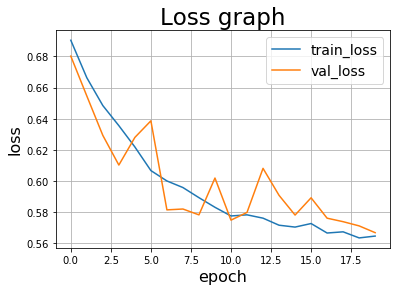

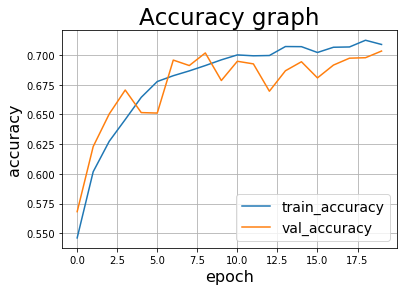

In [5]:
# 4. Plotting loss graph and accuracy graph on training and verification set 

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Loss graph', fontsize='23')

plt.legend(['train_loss', 'val_loss'], fontsize='14')
plt.grid()
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Accuracy graph', fontsize='23')

plt.legend(['train_accuracy', 'val_accuracy'], fontsize='14')
plt.grid()
plt.show()

In [6]:
# 5. Evaluating the accuracy of verification set 

loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)

print (accuracy)

0.7034000158309937


## # Enhancing the Efficiency of Recurrent Neual Network model using embedding layer

In [7]:
# 1. Embedding Class importing 

from tensorflow.keras.layers import Embedding

In [8]:
# 2. Preparing training dataset 
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]    
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]  
y_val = y_train_all[random_index[20000:]]

In [9]:
# 3. Alligning sample length 

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [10]:
# 4. Generating model 

model_ebd = Sequential()
model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 5. Model compiling and training 

model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs= 10, batch_size=32, 
                        validation_data =(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 4s 7ms/step - loss: 0.6820 - accuracy: 0.5534 - val_loss: 0.6641 - val_accuracy: 0.5906
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5917 - accuracy: 0.6845 - val_loss: 0.5403 - val_accuracy: 0.7394
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4547 - accuracy: 0.7944 - val_loss: 0.5071 - val_accuracy: 0.7718
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4197 - accuracy: 0.8147 - val_loss: 0.5064 - val_accuracy: 0.7654
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3845 - accuracy: 0.8321 - val_loss: 0.5145 - val_accuracy: 0.7712
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3589 - accuracy: 0.8486 - val_loss: 0.4997 - val_accuracy: 0.7726
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3424 - accuracy: 0.8576 - val_loss: 0.4967 - val_accuracy: 0.7898
Epoch 

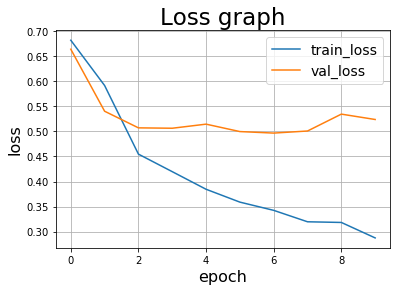

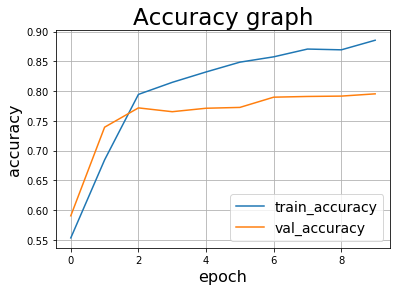

In [12]:
# 6. plotting loss graph and accuracy graph 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Loss graph', fontsize='23')

plt.legend(['train_loss', 'val_loss'], fontsize='14')
plt.grid()
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Accuracy graph', fontsize='23')

plt.legend(['train_accuracy', 'val_accuracy'], fontsize='14')
plt.grid()
plt.show()

In [13]:
# 7. Evaluating accuracy of verification set 

loss, accurady = model_ebd.evaluate(x_val_seq, y_val, verbose=0)

print(accuracy)

0.7034000158309937
